In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(5)

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [4]:
#Проверка на пропуски в данных
df.isnull().sum()

id        0
f_00      0
f_01      0
f_02      0
f_03      0
f_04      0
f_05      0
f_06      0
f_07      0
f_08      0
f_09      0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
target    0
dtype: int64

Пропущенных значений не обнаружено

**Рассмотрим график распределения целевой переменной**

Кол-во 0 в таргет:  462161
Кол-во 1 в таргет:  437839


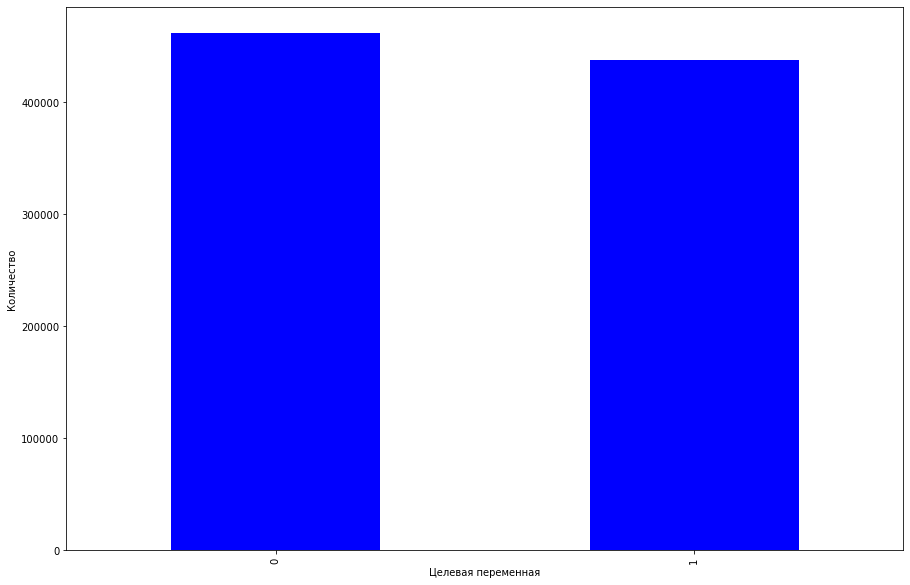

In [10]:
import matplotlib.pyplot as plt
feature = "target"
ax = df[feature].value_counts().plot(kind='bar',
                                    figsize=(15,10), 
                                    color='blue')
ax.set_xlabel("Целевая переменная")
ax.set_ylabel("Количество")

zero_y = df.apply(lambda x: True if x["target"] == 0 else False, axis = 1)
print("Кол-во 0 в таргет: ",len(zero_y[zero_y==True].index))
one_y = df.apply(lambda x: True if x["target"] == 1 else False, axis = 1)
print("Кол-во 1 в таргет: ",len(one_y[one_y==True].index))

Кол-во классов 0 и 1 примерно одинаково
Рассмотрим распределения переменных

array([[<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<Ax

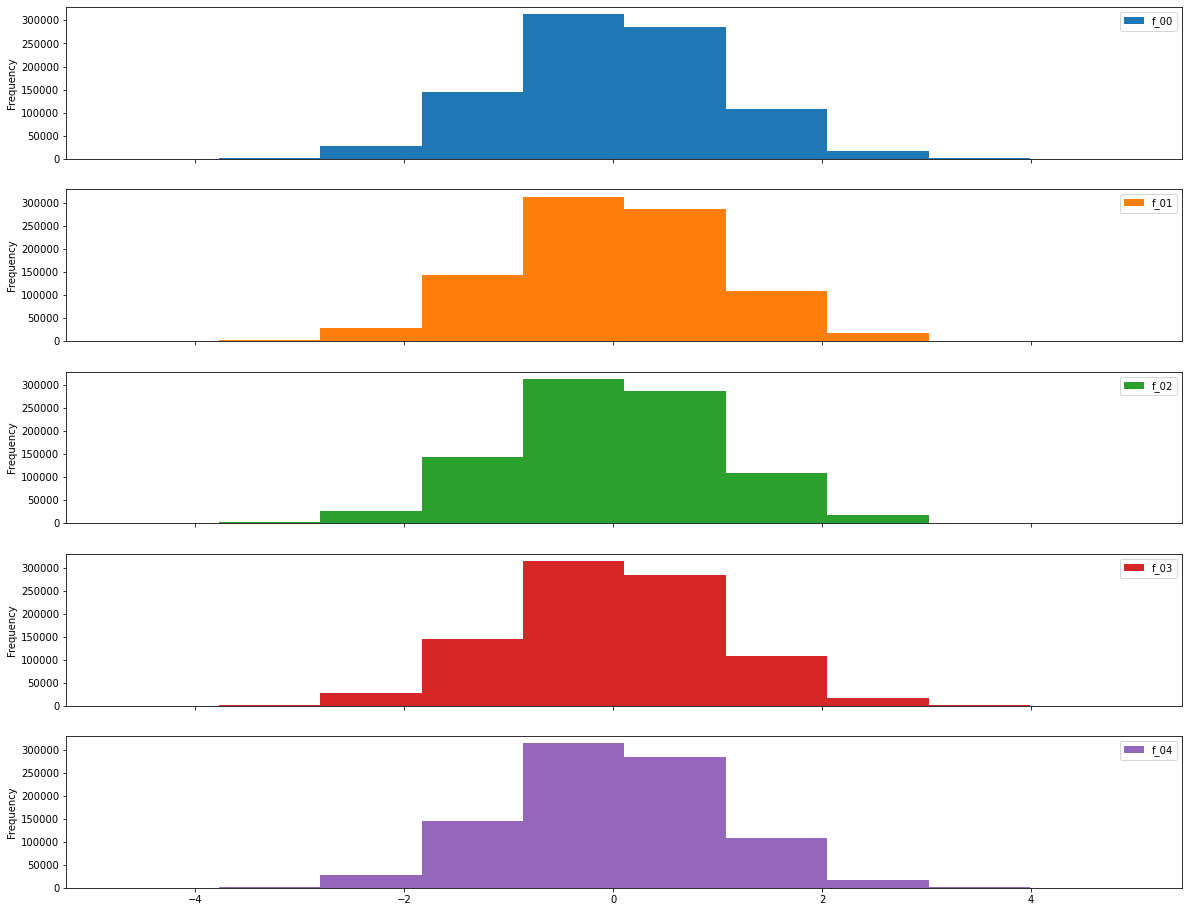

In [12]:
df.iloc[:,1:6].plot(kind = 'hist',figsize=(20,100),subplots=True, layout = (30,1))

array([[<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>],
       [<Ax

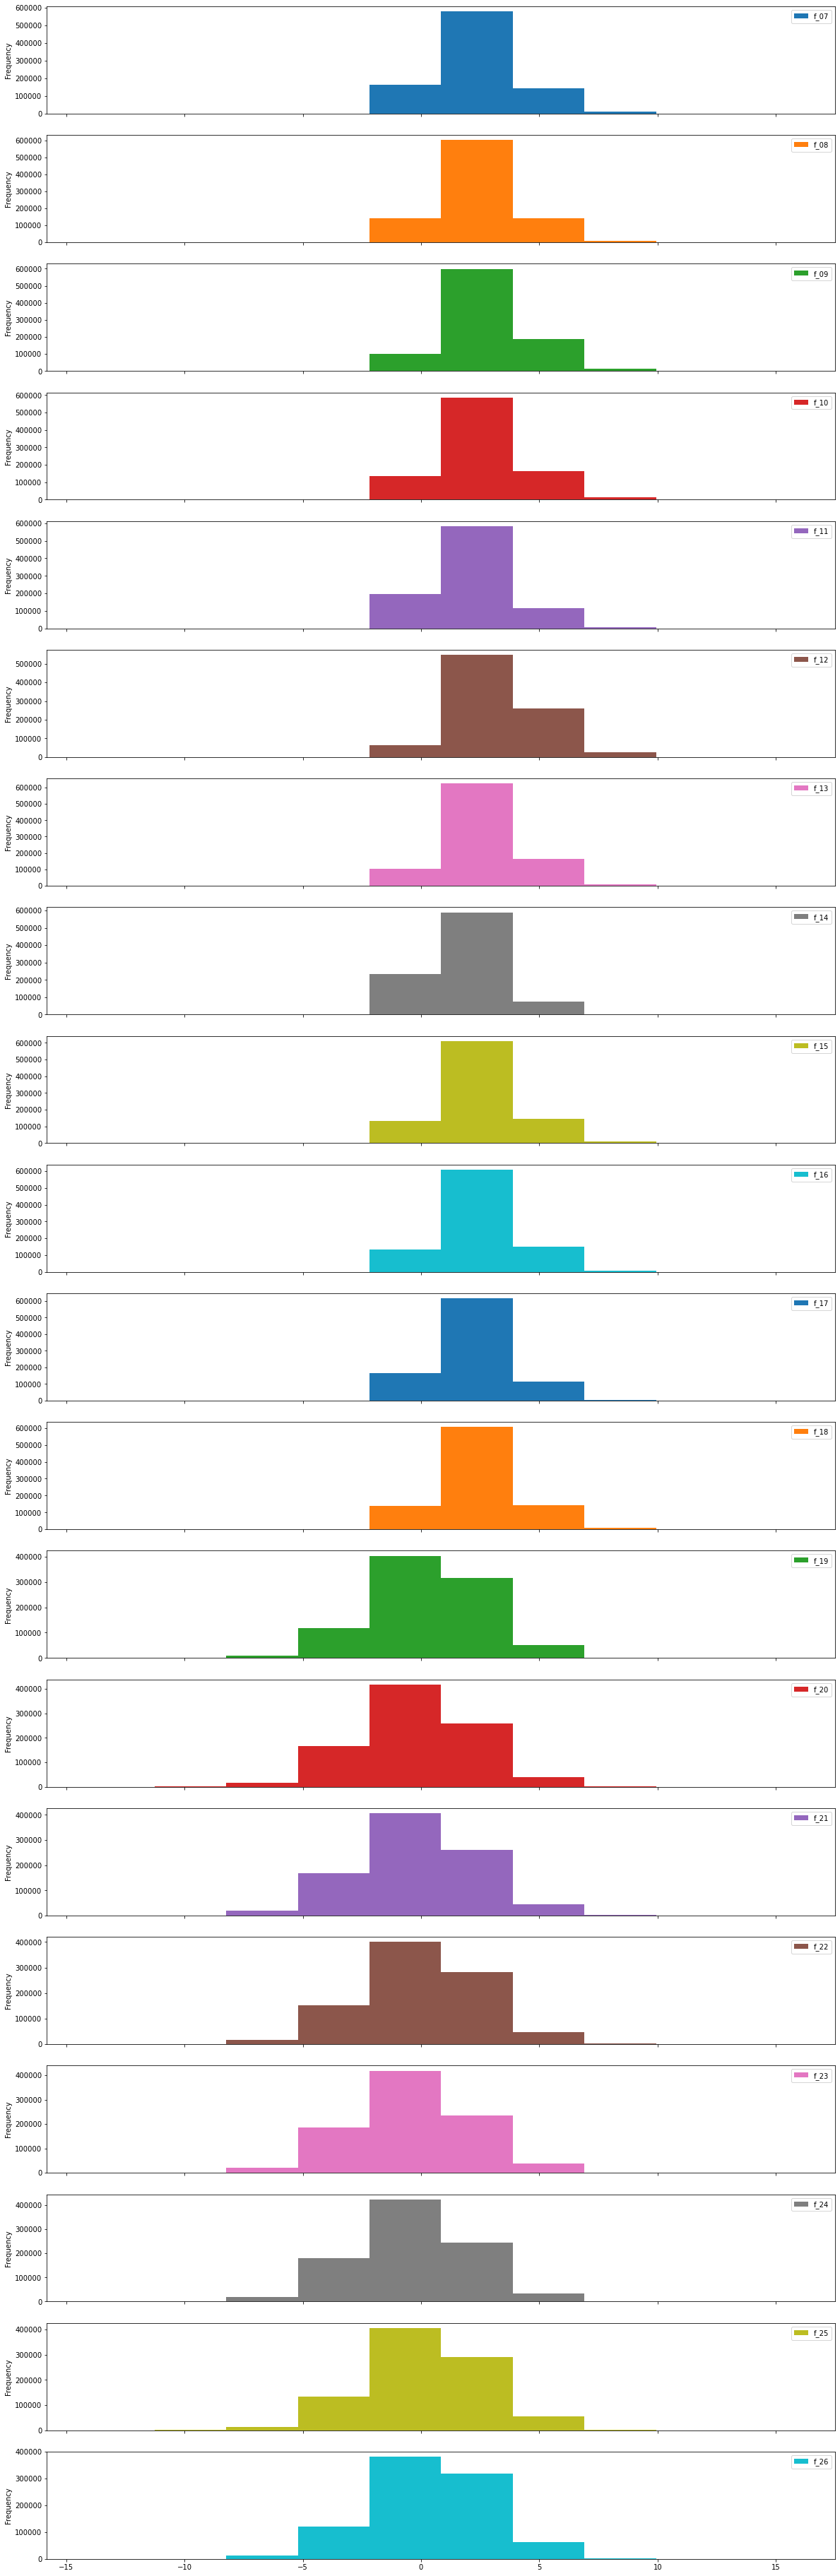

In [18]:
df.iloc[:,8:28].plot(kind = 'hist',figsize=(20,100),subplots=True, layout = (30,1))

Text(0, 0.5, 'Количество')

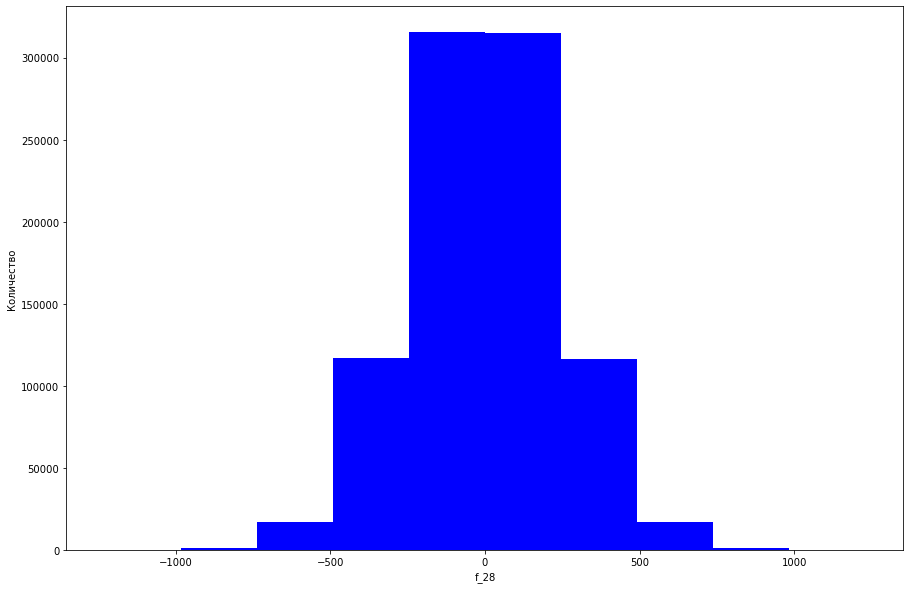

In [26]:
feature = "f_28"
ax = df[feature].plot(kind='hist',
                                    figsize=(15,10), 
                                    color='blue')
ax.set_xlabel("f_28")
ax.set_ylabel("Количество")

Text(0, 0.5, 'Количество')

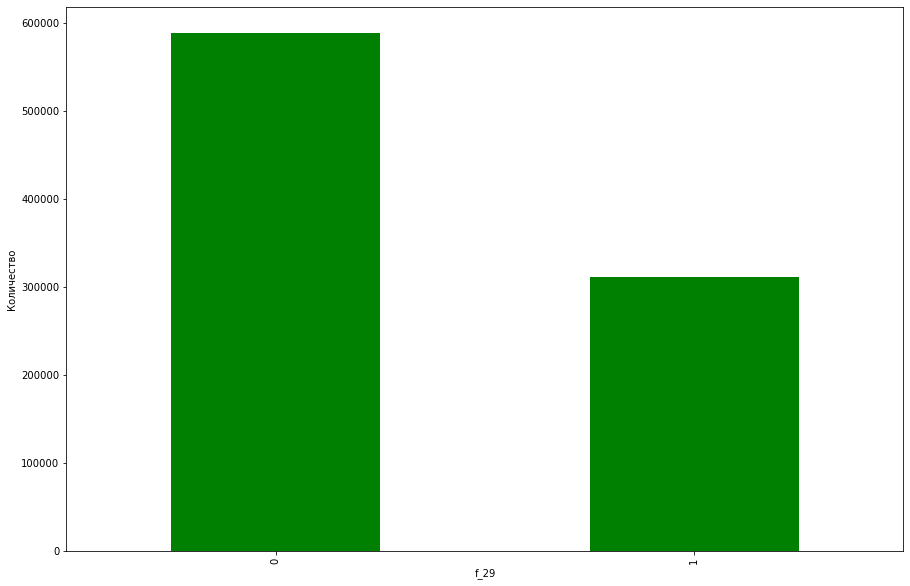

In [27]:
feature = "f_29"
ax = df[feature].value_counts().plot(kind='bar',
                                    figsize=(15,10), 
                                    color='green')
ax.set_xlabel("f_29")
ax.set_ylabel("Количество")

Text(0, 0.5, 'Количество')

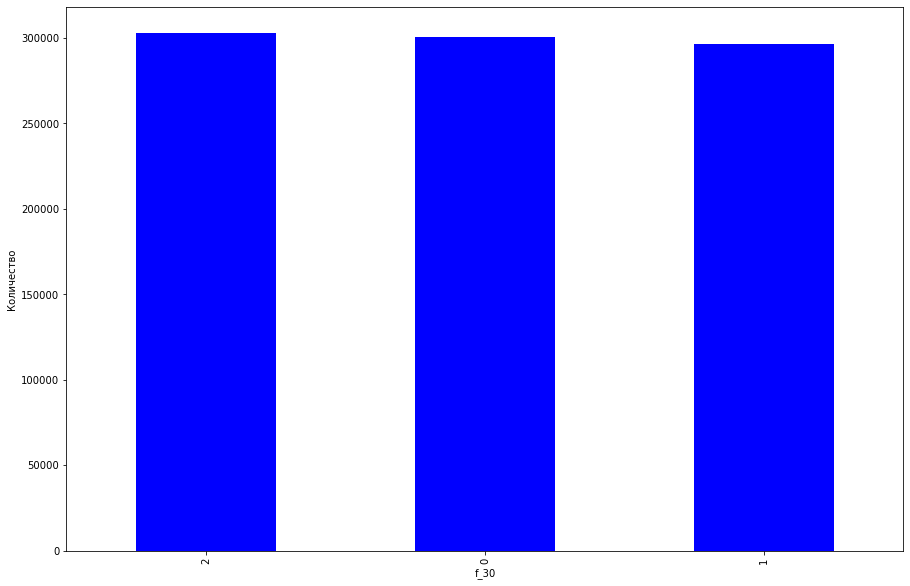

In [29]:
feature = "f_30"
ax = df[feature].value_counts().plot(kind='bar',
                                    figsize=(15,10), 
                                    color='blue')
ax.set_xlabel("f_30")
ax.set_ylabel("Количество")

**Построим корреляционную матрицу**

In [31]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Koche\AppData\Local\Temp/ipykernel_15460/2001914525.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target
id,1.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00
f_00,-0.00,1.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.19,0.00,-0.00,0.06
f_01,0.00,-0.00,1.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.19,-0.00,-0.00,0.06
f_02,0.00,0.00,0.00,1.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.21,-0.00,-0.00,0.03
f_03,0.00,-0.00,-0.00,0.00,1.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.33,-0.00,0.00,-0.00
f_04,0.00,-0.00,-0.00,0.00,0.00,1.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.17,-0.00,0.00,0.00
f_05,0.00,0.00,0.00,-0.00,0.00,0.00,1.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.30,-0.00,-0.00,0.03
f_06,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.16,0.00,0.00,-0.00
f_07,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,1.00,0.11,0.01,-0.09,-0.14,0.09,0.06,-0.06,0.06,0.06,-0.15,0.03,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.05,0.00,0.01
f_08,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.11,1.00,-0.07,-0.09,-0.10,0.01,0.04,-0.04,0.01,0.05,-0.05,0.07,-0.01,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.06,0.00,0.04


In [33]:
from optbinning import OptimalBinning

In [40]:
variable = "f_00"
x = df[variable].values
y = df["target"].values
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")
optb.fit(x, y)
binning_table = optb.binning_table
binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -1.62)",47599,0.052888,27117,20482,0.430303,0.226552,0.002695,3.361253e-04
1,"[-1.62, -1.08)",78096,0.086773,42820,35276,0.451700,0.13974,0.001689,2.108935e-04
2,"[-1.08, -0.85)",51755,0.057506,27783,23972,0.463182,0.093476,0.000501,6.266083e-05
3,"[-0.85, -0.53)",91943,0.102159,48817,43126,0.469051,0.06989,0.000498,6.227985e-05
4,"[-0.53, -0.23)",98072,0.108969,51439,46633,0.475498,0.044026,0.000211,2.637973e-05
5,"[-0.23, 0.04)",96370,0.107078,49906,46464,0.482142,0.017401,0.000032,4.051888e-06
6,"[0.04, 0.20)",57374,0.063749,29399,27975,0.487590,-0.004413,0.000001,1.551693e-07
7,"[0.20, 0.45)",84944,0.094382,43112,41832,0.492466,-0.023922,0.000054,6.753272e-06
8,"[0.45, 0.85)",115512,0.128347,57451,58061,0.502640,-0.064624,0.000536,6.702433e-05
9,"[0.85, 1.08)",51283,0.056981,24983,26300,0.512841,-0.105435,0.000634,7.918251e-05


In [41]:
print("Gini for f_00:",binning_table.gini)

Gini for f_00: 0.06123161034081981


In [42]:
df = df.drop(columns="f_27")

In [49]:
d = {}
for i in range(0,31):
    if i < 10:
        variable = "f_0"+str(i)
    elif i == 27:
        continue
    else:
        variable = "f_"+str(i)
    x = df[variable].values
    y = df["target"].values
    optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")
    optb.fit(x, y)
    binning_table = optb.binning_table
    binning_table.build()
    d[variable] = binning_table.gini
    print("Gini for",variable,":",binning_table.gini,"IV:",binning_table.iv)

Gini for f_00 : 0.06123161034081981 IV: 0.01204044876723164
Gini for f_01 : 0.06095865912237963 IV: 0.012100669038978266
Gini for f_02 : 0.03485111745188507 IV: 0.004120630374125174
Gini for f_03 : 0.0014277744516091317 IV: 2.0812418040112343e-05
Gini for f_04 : 0.0032722027644855878 IV: 4.801938697418088e-05
Gini for f_05 : 0.036130451924349605 IV: 0.004348836276139384
Gini for f_06 : 0.0022024040758754637 IV: 4.3745541580640186e-05
Gini for f_07 : 0.017162532985913304 IV: 0.0012952976804363253
Gini for f_08 : 0.07087727967057367 IV: 0.019283596983755293
Gini for f_09 : 0.0723333854155791 IV: 0.017701868063828546
Gini for f_10 : 0.0464321025678055 IV: 0.007749588703397119
Gini for f_11 : 0.08446955193265293 IV: 0.02530847657741471
Gini for f_12 : 0.024982335469723504 IV: 0.003056686532681238
Gini for f_13 : 0.03835607597553525 IV: 0.0047623049791102314
Gini for f_14 : 0.025185613839214915 IV: 0.0031646682789524174
Gini for f_15 : 0.059137070230343425 IV: 0.015902974568030765
Gini for 

In [51]:
sorted_d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}

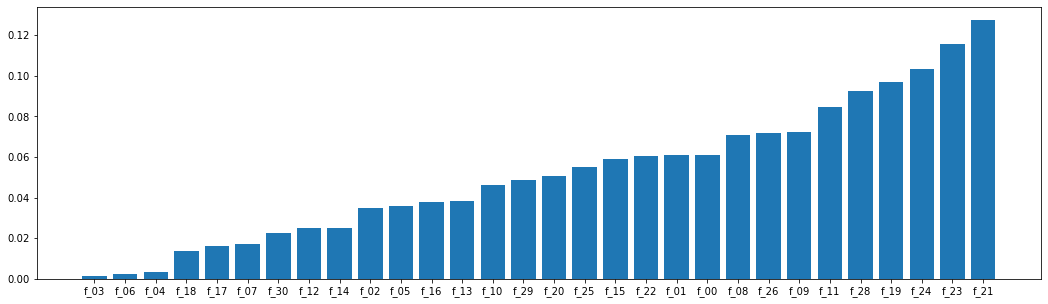

In [61]:
f, ax = plt.subplots(figsize=(18,5))
plt.bar(range(len(sorted_d)), list(sorted_d.values()), align='center')
plt.xticks(range(len(sorted_d)), list(sorted_d.keys()))
plt.show()

In [81]:
#Выводим 3-йку лучших переменных
import collections
[last] = collections.deque(sorted_d, maxlen=1)
last

ValueError: too many values to unpack (expected 1)